In [ ]:
pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
pip install tqdm

# Importing libraries and ***packages***

In [ ]:
import numpy as np
from sklearn import datasets
from torchvision.datasets import CIFAR100
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.nn import Sequential
from sklearn.metrics import confusion_matrix
import numpy as np
from collections import defaultdict
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import pandas as pd
import numpy as np
import os
import random
import shutil
from PIL import Image
import matplotlib.image as mpimg
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize
from torchsummary import summary
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2



In [ ]:
torch.manual_seed(42)


# Choosing device configuration

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Importing the dataset

In [ ]:

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = datasets.SVHN(root='./data', split='test', transform=transform, download=True)


100%|██████████| 182040794/182040794 [00:29<00:00, 6250514.86it/s]


100%|██████████| 64275384/64275384 [00:19<00:00, 3322330.15it/s]


# Dividing training into training and validation set

In [ ]:
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

# Making data loaders for training, validation and testing set

In [ ]:
batch_size=128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
images, _ = next(iter(train_loader))

# Displaying sample images of datset

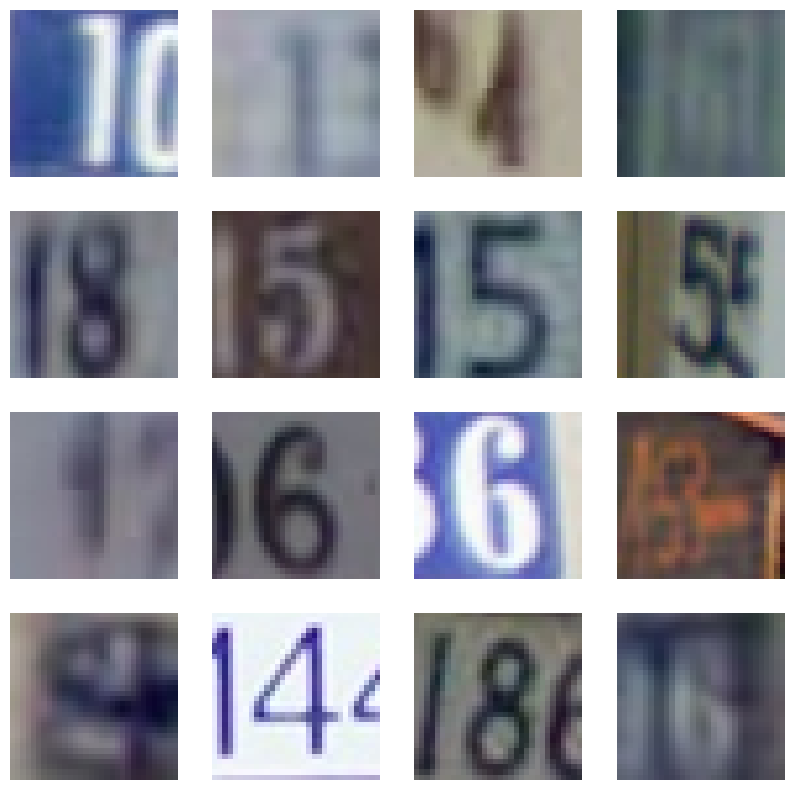

In [ ]:

num_images = 16
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())
    plt.axis('off')
plt.show()


In [ ]:

latent_dim = 100
channels = 3
img_shape = (32, 32)


In [ ]:
transform = transforms.Compose([
    transforms.Resize(img_shape),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

In [ ]:
svhn_dataset = datasets.SVHN(root="./data", split="train", download=True, transform=transform)
dataloader = DataLoader(svhn_dataset, batch_size=batch_size, shuffle=True)

Using downloaded and verified file: ./data/train_32x32.mat


In [ ]:
def calculate_activation_statistics(images,model,batch_size=128, dims=2048,
                    cuda=False):
    model.eval()
    act=np.empty((len(images), dims))

    if cuda:
        batch=images.cuda()
    else:
        batch=images
    pred = model(batch)[0]

    if pred.size(2) != 1 or pred.size(3) != 1:

    act= pred.cpu().data.numpy().reshape(pred.size(0), -1)

    mu = np.mean(act, axis=0)
    sigma = np.cov(act, rowvar=False)
    return mu, sigma

In [ ]:
def calculate_frechet_distance(mu1, sigma1, mu2, sigma2, eps=1e-6):
    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)


    diff = mu1 - mu2


    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps



    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)

In [ ]:
def calculate_fretchet(images_real,images_fake,model):
     mu_1,std_1=calculate_activation_statistics(images_real,model,cuda=True)
     mu_2,std_2=calculate_activation_statistics(images_fake,model,cuda=True)
     fid_value = calculate_frechet_distance(mu_1, std_1, mu_2, std_2)
     return fid_value

# Architecture of DCGAN

In [ ]:

def scale(x, feature_range=(-1, 1)):
    return x * 2 * (feature_range[1] - feature_range[0]) + feature_range[0]

def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    if smooth:
        labels = torch.ones(batch_size) * 0.9
    else:
        labels = torch.ones(batch_size)
    if torch.cuda.is_available():
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    if torch.cuda.is_available():
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss


class Discriminator(nn.Module):
    def __init__(self, input_dim, num_categories, num_continuous):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, 64, kernel_size=4, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2)
        self.fc_common = nn.Linear(256*2*2, 128)

        self.fc_d = nn.Linear(128, 1)
        self.fc_q = nn.Linear(128, num_categories + num_continuous)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2(x), 0.2)
        x = F.leaky_relu(self.conv3(x), 0.2)
        x = x.view(-1, 2*2*256)
        x = F.leaky_relu(self.fc_common(x), 0.2)
        d_out = self.fc_d(x)
        return d_out


class Generator(nn.Module):
    def __init__(self, input_dim, num_output_channels):
        super(Generator, self).__init__()
        self.fc = nn.Linear(input_dim, 2*2*448)
        self.upconv1 = nn.ConvTranspose2d(448, 256, kernel_size=4, stride=2)
        self.bn1 = nn.BatchNorm2d(256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.upconv3 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.upconv4 = nn.ConvTranspose2d(64, num_output_channels, kernel_size=4, stride=2)

    def forward(self, x):
        x = F.relu(self.fc(x))
        x = x.view(-1, 448, 2, 2)
        x = F.relu(self.bn1(self.upconv1(x)))
        x = F.relu(self.bn2(self.upconv2(x)))
        x = F.relu(self.bn3(self.upconv3(x)))
        x = torch.tanh(self.upconv4(x))
        return x


# Min_max loss

In [ ]:
def min_max_loss(D_real, D_fake):

    D_loss = -torch.mean(torch.log(D_real) + torch.log(1 - D_fake))
    G_loss = -torch.mean(torch.log(D_fake))
    return D_loss, G_loss


# LSGAN loss

In [ ]:
import torch.nn.functional as F

def lsgan_loss(D_real, D_fake):

    D_loss_real = F.mse_loss(D_real, torch.ones_like(D_real))
    D_loss_fake = F.mse_loss(D_fake, torch.zeros_like(D_fake))
    D_loss = 0.5 * (D_loss_real + D_loss_fake)
    G_loss = 0.5 * F.mse_loss(D_fake, torch.ones_like(D_fake))
    return D_loss, G_loss


In [ ]:

lr_d = 0.001
lr_g = 0.001
batch_size = 64
z_size = 124

# Implementation

In [ ]:
batch_size = 64
lr = 0.0002
nz = 168
epochs = 20

In [ ]:
G= Generator(nz).to(device)
D= Discriminator().to(device)

# Optimizers
g_optimizer = optim.Adam(Generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(Discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCEWithLogitsLoss()

In [ ]:
optimizer_G = optim.Adam(Generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(Discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 25
batch_size = 64
real_label = 1
fake_label = 0


In [ ]:
def scale(x, feature_range=(-1, 1)):


    min, max = feature_range
    x = x * (max - min) + min
    return x

In [ ]:
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    if smooth:
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size)
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [ ]:
def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [ ]:
train_on_gpu = torch.cuda.is_available()

In [ ]:
samples = []
losses = []


In [ ]:
# Fixed noise for visualization
fixed_z = np.random.uniform(-1, 1, size=(64, 200))
fixed_z = torch.from_numpy(fixed_z).float()
if train_on_gpu:
    fixed_z = fixed_z.cuda()


# Training Data

Epoch:   1/25 Discriminator Loss:  0.5118  Generator Loss: 16.1181
Epoch:   2/25 Discriminator Loss:  2.0635  Generator Loss:  1.1074
Epoch:   3/25 Discriminator Loss:  1.1512  Generator Loss:  1.3255
Epoch:   4/25 Discriminator Loss:  1.2523  Generator Loss:  1.4457
Epoch:   5/25 Discriminator Loss:  1.3070  Generator Loss:  1.4936


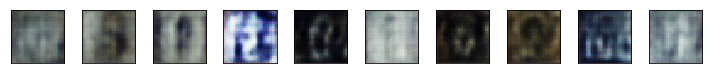

Epoch:   6/25 Discriminator Loss:  1.4173  Generator Loss:  0.5979
Epoch:   7/25 Discriminator Loss:  1.5834  Generator Loss:  1.8457
Epoch:   8/25 Discriminator Loss:  1.4728  Generator Loss:  1.0308
Epoch:   9/25 Discriminator Loss:  1.0157  Generator Loss:  1.4005
Epoch:  10/25 Discriminator Loss:  0.8864  Generator Loss:  1.7082


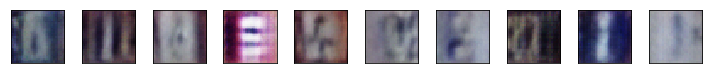

Epoch:  11/25 Discriminator Loss:  1.4113  Generator Loss:  1.7030
Epoch:  12/25 Discriminator Loss:  1.3642  Generator Loss:  1.7837
Epoch:  13/25 Discriminator Loss:  1.5370  Generator Loss:  1.9959
Epoch:  14/25 Discriminator Loss:  1.1734  Generator Loss:  1.8924
Epoch:  15/25 Discriminator Loss:  1.5878  Generator Loss:  1.6711


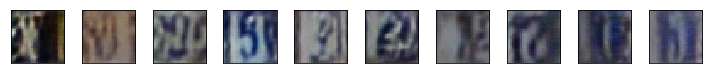

Epoch:  16/25 Discriminator Loss:  1.3258  Generator Loss:  1.8857
Epoch:  17/25 Discriminator Loss:  1.6205  Generator Loss:  1.8108
Epoch:  18/25 Discriminator Loss:  1.5971  Generator Loss:  2.1411
Epoch:  19/25 Discriminator Loss:  1.5212  Generator Loss:  2.6963
Epoch:  20/25 Discriminator Loss:  1.7137  Generator Loss:  2.3894


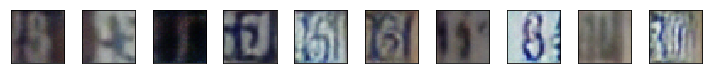

Epoch:  21/25 Discriminator Loss:  1.8297  Generator Loss:  2.4010
Epoch:  22/25 Discriminator Loss:  1.5695  Generator Loss:  2.2581
Epoch:  23/25 Discriminator Loss:  1.7912  Generator Loss:  2.9209
Epoch:  24/25 Discriminator Loss:  1.3153  Generator Loss:  2.0092
Epoch:  25/25 Discriminator Loss:  1.6001  Generator Loss:  2.4412


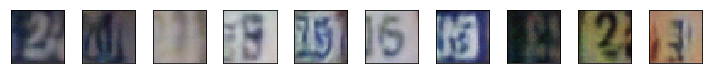

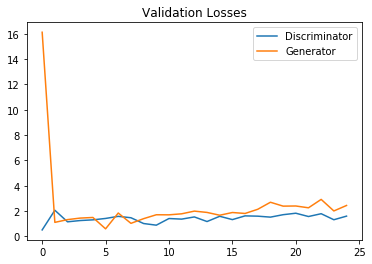

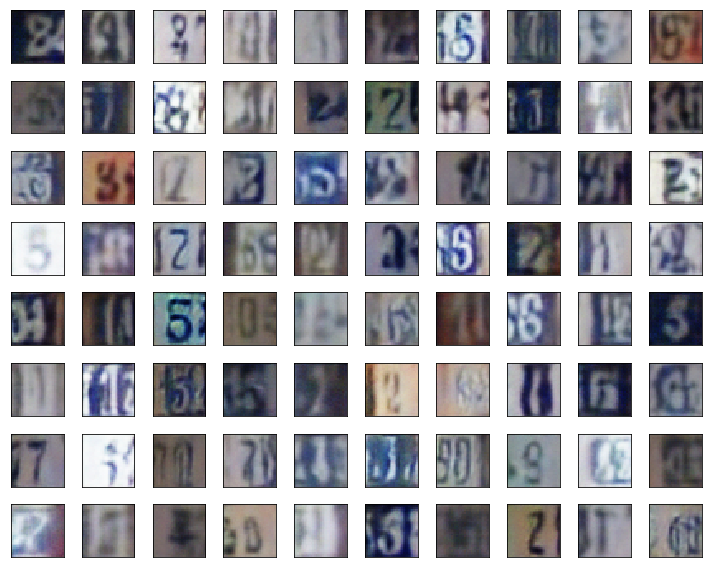

In [ ]:

# Train the network
for epoch in range(num_epochs):

    for batch_i, (real_images, _) in enumerate(train_loader):

        batch_size = real_images.size(0)

        real_images = scale(real_images)

        d_optimizer.zero_grad()


        if torch.cuda.is_available():
            real_images = real_images.to(device)

        D_real = Discriminator(real_images)
        d_real_loss = real_loss(D_real)

        z = torch.FloatTensor(np.random.uniform(-1, 1, size=(batch_size, z_size)))
        if torch.cuda.is_available():
            z = z.cuda()
        fake_images = Generator(z)

        D_fake = Discriminator(fake_images)
        d_fake_loss = fake_loss(D_fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        g_optimizer.zero_grad()

        z = torch.FloatTensor(np.random.uniform(-1, 1, size=(batch_size, z_size)))
        if torch.cuda.is_available():
            z = z.cuda()
        fake_images = Generator(z)

        D_fake = Discriminator(fake_images)
        g_loss = real_loss(D_fake)

        g_loss.backward()
        g_optimizer.step()


        if batch_i % print_every == 0:

            losses.append((d_loss.item(), g_loss.item()))
            # Print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    # Generate and plot sample, fake images
    Generator.eval()
    if torch.cuda.is_available():
        fixed_z = fixed_z.cuda()
    samples_z = Generator(fixed_z)
    samples.append(samples_z)

    # Plot generated samples
    sample_images = samples_z.cpu().detach().numpy()
    sample_images = np.transpose(sample_images, (0, 2, 3, 1))  # Reorder dimensions for matplotlib

    fig, axes = plt.subplots(figsize=(7, 7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), sample_images):
        ax.axis('off')
        ax.imshow((img + 1) / 2)  # Scale images back to [0, 1] for display
    plt.show()

    Generator.train()


# Implementing LSGAN loss

100%|██████████| 182040794/182040794 [00:12<00:00, 14375160.93it/s]


Epoch [ 1/20] | Batch [  1/573] | d_loss: 1.3772 | g_loss: 0.6968
Epoch [ 1/20] | Batch [401/573] | d_loss: 0.3259 | g_loss: 2.3332
Epoch [ 2/20] | Batch [  1/573] | d_loss: 0.3438 | g_loss: 1.9212
Epoch [ 2/20] | Batch [401/573] | d_loss: 0.4049 | g_loss: 1.4576
Epoch [ 3/20] | Batch [  1/573] | d_loss: 0.3078 | g_loss: 1.8805
Epoch [ 3/20] | Batch [401/573] | d_loss: 0.9225 | g_loss: 0.8514
Epoch [ 4/20] | Batch [  1/573] | d_loss: 1.0381 | g_loss: 0.8590
Epoch [ 4/20] | Batch [401/573] | d_loss: 0.8439 | g_loss: 0.9798
Epoch [ 5/20] | Batch [  1/573] | d_loss: 0.8061 | g_loss: 1.0179
Epoch [ 5/20] | Batch [401/573] | d_loss: 0.9232 | g_loss: 0.8191
Epoch [ 6/20] | Batch [  1/573] | d_loss: 1.1197 | g_loss: 0.7144
Epoch [ 6/20] | Batch [401/573] | d_loss: 0.9594 | g_loss: 0.6679
Epoch [ 7/20] | Batch [  1/573] | d_loss: 0.8520 | g_loss: 0.8543
Epoch [ 7/20] | Batch [401/573] | d_loss: 0.8420 | g_loss: 0.8002
Epoch [ 8/20] | Batch [  1/573] | d_loss: 1.0184 | g_loss: 0.6803
Epoch [ 8/

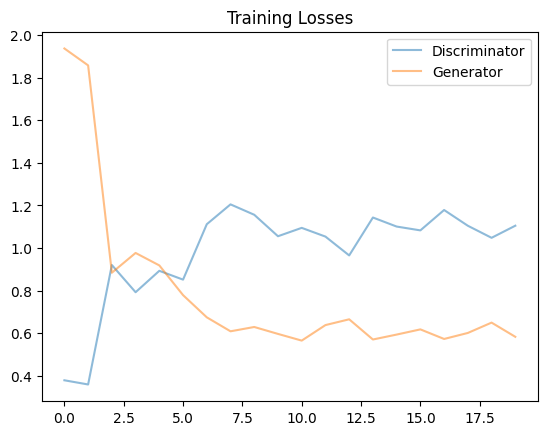

In [ ]:
# Define DCGAN parameters
conv_dim = 32
z_size = 200
lr = 0.00003
beta1 = 0.9
beta2 = 0.999



# Train the DCGAN
num_epochs = 20
print_every = 400
samples = []
losses = []

# Fixed noise for visualization
fixed_z = np.random.uniform(-1, 1, size=(64, z_size))
fixed_z = torch.from_numpy(fixed_z).float()
if train_on_gpu:
    fixed_z = fixed_z.cuda()

# Train
for epoch in range(num_epochs):
    # Initialize batch counter
    batch_count = 0

    for batch_i, (real_images, _) in enumerate(train_loader):
        # Increment batch counter
        batch_count += 1

        batch_size = real_images.size(0)
        real_images = scale(real_images)

        # Train the discriminator
        d_optimizer.zero_grad()

        if train_on_gpu:
            real_images = real_images.cuda()

        D_real = D(real_images)
        d_real_loss = real_loss(D_real)

        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        if train_on_gpu:
            z = z.cuda()

        fake_images = G(z)
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train the generator
        g_optimizer.zero_grad()

        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        if train_on_gpu:
            z = z.cuda()

        fake_images = G(z)
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake)
        g_loss.backward()
        g_optimizer.step()

        # Print training stats
        if batch_i % print_every == 0:
            print('Epoch [{:2d}/{:2d}] | Batch [{:3d}/{:3d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                epoch+1, num_epochs, batch_count, len(train_loader), d_loss.item(), g_loss.item()))

    # Append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))

    # Generate and save sample, fake images
    G.eval()
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train()


# Plot training losses
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()
plt.show()



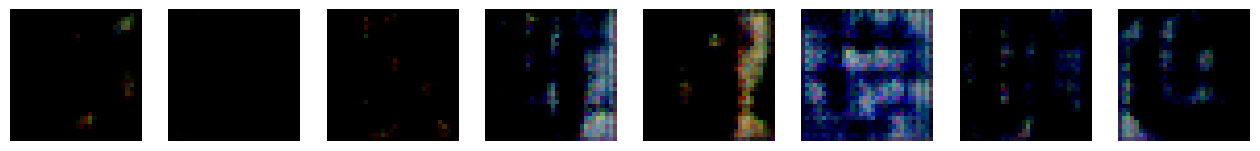

Discriminator classification for generated images:
tensor([[0.5304],
        [0.5821],
        [0.2399],
        [1.1269],
        [0.9210],
        [2.2175],
        [0.0190],
        [0.3307],
        [4.0719],
        [0.3793],
        [0.2733],
        [0.4872],
        [0.5067],
        [0.2061],
        [0.6510],
        [0.1843],
        [1.8813],
        [0.4709],
        [1.0734],
        [0.9295],
        [0.7058],
        [1.5476],
        [0.8009],
        [0.5381],
        [0.4825],
        [0.5090],
        [0.5244],
        [1.1329],
        [0.8067],
        [0.7288],
        [0.4145],
        [1.6939],
        [3.7221],
        [3.8156],
        [0.3914],
        [0.9312],
        [0.0660],
        [0.7150],
        [0.3468],
        [0.5862],
        [2.0275]], device='cuda:0')


In [ ]:
# Reconstruct images from the generator
with torch.no_grad():
    device = torch.device("cuda")
    fixed_z = torch.randn(batch_size, z_size, 1, 1).to(device)  # Keep all dimensions
    fixed_z = fixed_z.view(-1, z_size)  # Reshape fixed_z to match the expected input size
    fake_images = G(fixed_z.view(-1, z_size))

# Increase contrast by scaling pixel values to a wider range
fake_images = (fake_images - fake_images.min()) / (fake_images.max() - fake_images.min())  # Scale to range [0, 1]
fake_images = fake_images * 2 - 1  # Scale to range [-1, 1]

# Visualize the reconstructed images
fig, axes = plt.subplots(figsize=(16, 4), ncols=8)
for i in range(8):
    fake_image_np = fake_images[i].cpu().detach()
    axes[i].imshow(np.transpose(fake_image_np, (1, 2, 0)))
    axes[i].axis('off')
plt.show()

# Display discriminator classification
with torch.no_grad():
    D_fake = D(fake_images)
print('Discriminator classification for generated images:')
print(D_fake)
